In [2]:
import numpy as np

In [3]:
import cv2

In [4]:
import matplotlib.pyplot as plt

In [5]:
faceCascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [6]:
eyeCascade=cv2.CascadeClassifier("haarcascade_eye.xml")

In [7]:
img=cv2.imread('WhatsApp Image 2024-08-23 at 22.37.08.jpeg')

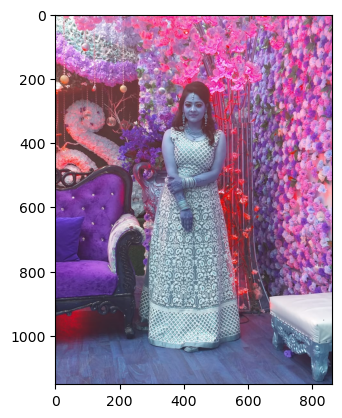

In [8]:
plt.imshow(img)

In [9]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

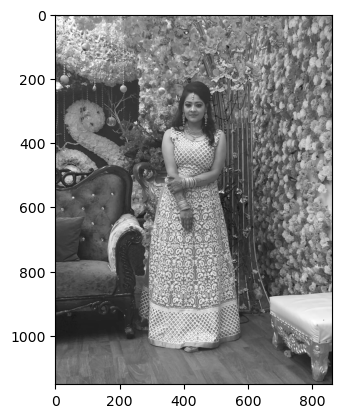

In [10]:
plt.imshow(gray_img,cmap='gray')

In [11]:
face=faceCascade.detectMultiScale(gray_img,1.3,5)

In [12]:
for (x,y,w,h) in face:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0), 3)
    gray_img = gray_img[y:y+h, x:x+w]
    eyes=eyeCascade.detectMultiScale(face_img)
for (ex,ey, ew, eh) in eyes:
     cv2. rectangle(face_img, (ex,ey), (ex+ew, ey+eh), (0,255,0),2)

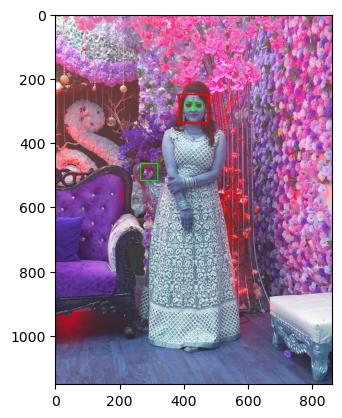

In [13]:
plt.imshow(face_img)

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray, 1.3, 5)  
        # Initialize eyes outside the loop
        eyes = []
    
        for (x, y, w, h) in faces:
            roi_gray = gray[y:y + h, x:x + w]
            roi_color = img[y:y + h, x:x + w]
            eyes = eyeCascade.detectMultiScale(roi_color)
            
            # If at least 2 eyes are detected in the face region
            if len(eyes) >= 2:
                return roi_color
    
    # If no faces or not enough eyes are found, return None
    return None

In [15]:
a=get_cropped_image_if_2_eyes('WhatsApp Image 2024-08-23 at 22.37.08.jpeg')

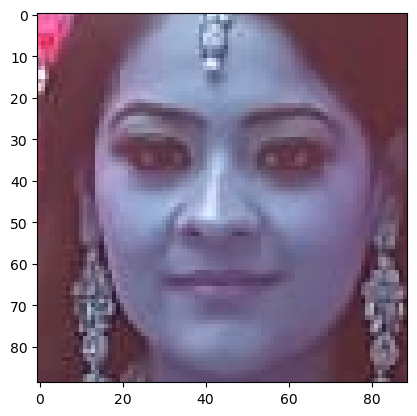

In [16]:
plt.imshow(a)

In [17]:
download="/Users/sarthaksuri/Downloads"

In [18]:
import os
img_dirs = []
for entry in os.scandir(download) :
     if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['/Users/sarthaksuri/Downloads/sharukh_khan',
 '/Users/sarthaksuri/Downloads/crop_img',
 '/Users/sarthaksuri/Downloads/akshay_kumar',
 '/Users/sarthaksuri/Downloads/katrina',
 '/Users/sarthaksuri/Downloads/kiara_advani',
 '/Users/sarthaksuri/Downloads/salman_khan']

In [20]:
crop_img="/Users/sarthaksuri/Downloads/crop_img"

In [21]:
name_dict={"sharukh_khan":[],"salman_khan":[],"kiara_advani":[],"akshay_kumar":[],"katrina":[]}
cropped_image_dirs = [];
count=1
for i in img_dirs:
    name=i.split('/')[-1]
    print(name)
    if(name in name_dict.keys()):
        print('inside')
        for j in os.scandir(i):
            image=get_cropped_image_if_2_eyes(j.path)
            if image is not None:
               # print('got')
               cropped_folder = crop_img + name
               if not os.path.exists(cropped_folder):                   
                    os.makedirs(cropped_folder)
               cropped_image_dirs.append(cropped_folder)
               cropped_file_name = name + str(count) + ".JPG"
               cropped_file_path = cropped_folder + "/" + cropped_file_name
               cv2.imwrite(cropped_file_path,image)
               count=count+1
               print("Generating cropped images in folder: ", cropped_folder)
               print("apending ")
               name_dict[name].append(cropped_file_path)

sharukh_khan
inside
Generating cropped images in folder:  /Users/sarthaksuri/Downloads/crop_imgsharukh_khan
apending 
Generating cropped images in folder:  /Users/sarthaksuri/Downloads/crop_imgsharukh_khan
apending 
Generating cropped images in folder:  /Users/sarthaksuri/Downloads/crop_imgsharukh_khan
apending 
Generating cropped images in folder:  /Users/sarthaksuri/Downloads/crop_imgsharukh_khan
apending 
Generating cropped images in folder:  /Users/sarthaksuri/Downloads/crop_imgsharukh_khan
apending 
Generating cropped images in folder:  /Users/sarthaksuri/Downloads/crop_imgsharukh_khan
apending 
Generating cropped images in folder:  /Users/sarthaksuri/Downloads/crop_imgsharukh_khan
apending 
Generating cropped images in folder:  /Users/sarthaksuri/Downloads/crop_imgsharukh_khan
apending 
Generating cropped images in folder:  /Users/sarthaksuri/Downloads/crop_imgsharukh_khan
apending 
Generating cropped images in folder:  /Users/sarthaksuri/Downloads/crop_imgsharukh_khan
apending 


In [22]:
class_dict ={"sharukh_khan":0,"salman_khan":1,"kiara_advani":2,"akshay_kumar":3,"katrina":4}

In [23]:
import pywt
def w2d(img, mode= 'haar' , level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0]*= 0;
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    return imArray_H

In [24]:
x=[]
y = []
for key,value in name_dict.items():
    for j in value:
        img = cv2.imread(j)
        if img is None:
            continue;
        scalled_raw_img = cv2.resize(img,(32, 32))
        img_har = w2d(img,'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[key])

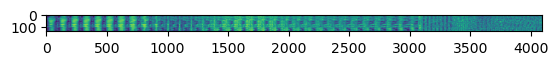

In [25]:
plt.imshow(x)

In [26]:
len(x[0])

4096

In [27]:
X=np.array(x).reshape(len(x),4096).astype(float)
X.shape

(135, 4096)

In [28]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

# model traing using svm

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.95,random_state=42)

In [32]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train) 
pipe.score(X_test, y_test)*100
y_pred=pipe.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.25      0.50      0.33         2
           3       0.00      0.00      0.00         2

    accuracy                           0.14         7
   macro avg       0.06      0.12      0.08         7
weighted avg       0.07      0.14      0.10         7



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [36]:
model = {
    'svm': {
        'model': SVC(gamma='auto', probability=True),
        'params': {
            'classifier__C': [1, 10, 100, 1000],
            'classifier__kernel': ['rbf', 'linear']  # Corrected 'svc_kernel' to 'svc__kernel'
        }
    },
    'Random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [1, 5, 10]  # Added correct '__' for pipeline
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'classifier__C': [1, 5, 10]  # Corrected key name to 'logisticregression__C'
        }
    }
}

In [37]:
scores = []
best_model = {}

# Loop through models and their parameters
for model_name, model_para in model.items():  # Use .items() to get both key and value
    pipe = Pipeline([
        ('scaler', StandardScaler()),  # Add a name for the scaler step
        ('classifier', model_para['model'])  # Add a name for the classifier step
    ])
    
    clf = GridSearchCV(pipe, model_para['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    
    scores.append({
        'model': model_name,  # Use the correct variable 'model_name'
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
    best_model[model_name] = clf.best_estimator_

# Create a DataFrame to display the results
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.727385,"{'classifier__C': 1, 'classifier__kernel': 'li..."
1,Random_forest,0.444000,{'classifier__n_estimators': 10}
2,logistic_regression,0.704308,{'classifier__C': 1}


In [38]:
best_model

{'svm': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'Random_forest': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', LogisticRegression(C=1, solver='liblinear'))])}

In [39]:
best_model['svm'].score(X_test,y_test)

0.2857142857142857

In [40]:
new_model=best_model['svm']

# save the model

In [42]:
!pip install joblib

In [43]:
import joblib
joblib.dump(new_model,"model.pkl")

['model.pkl']

In [44]:
import json
with open ("class_dictionary json","w") as f:
    f.write(json.dumps(class_dict))